In [108]:
import igraph as ig
import pandas as pd



nodes = pd.read_csv('./InputFileNodesTrial.csv')
edges = pd.read_csv('./InputFileEdgesTrial.csv') #Importar datos
g = ig.Graph.TupleList(edges.values,directed=False, #Forma tuples con las conexiones de los nodos, e indica si usar flechas
                       edge_attrs=edges.columns[2:])#Guarda los atributos extras (peso,tipo,etc)





IGRAPH UNW- 4 6 --
+ attr: name (v), weight (e)
+ edges (vertex names):
B1 -- B2, B3, B4   B2 -- B1, B3, B4   B3 -- B1, B2, B4   B4 -- B1, B2, B3


,id,gen-predominante
0,B1,N
1,B2,S
2,B3,W


In [87]:
nodes_df = nodes.set_index(['id'])
nodes_df.head(3) #Organizar el dataframe

,gen-predominante
id,
B1,N
B2,S
B3,W


In [109]:


for column in nodes_df:   
    
    g.vs[column] = nodes_df.loc[g.vs['name'],column] #g.vs guarda los atributos relacionados con los vertices (nodos)
                                                     #El atributo es el gen-dominante en este caso (Se pueden agregar mas)


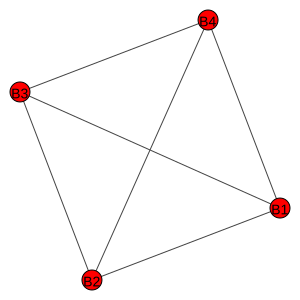

In [129]:

ig.plot(g, "Graph.png", bbox=(300,300), vertex_label=g.vs["name"]) 

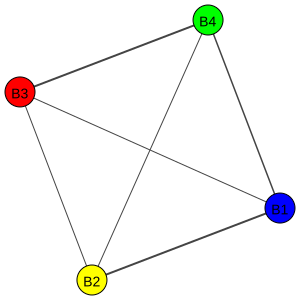

In [131]:
vertex_type_dict = {"N": "blue", "S": "yellow", "W": "red","E":"green"} #Colores asignados a los genes
visual_style = {}

visual_style["vertex_size"] = 30 #tamano nodo
visual_style["vertex_color"] = [vertex_type_dict[type_label] for type_label in g.vs["gen-predominante"]] #asignar color
visual_style["vertex_label"] = g.vs["name"] #nombre de los nodos
visual_style["edge_width"] = [weight/10 for weight in g.es['weight']]
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20
ig.plot(g, "Graph_color.png", **visual_style)

(6, 3) 
 (6, 3)


,from,to,weight
0,B1,B2,20
1,B1,B3,10
2,B1,B4,15
3,B2,B3,10
4,B2,B4,10
5,B3,B4,20


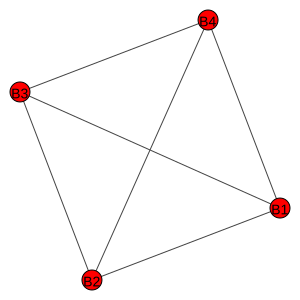

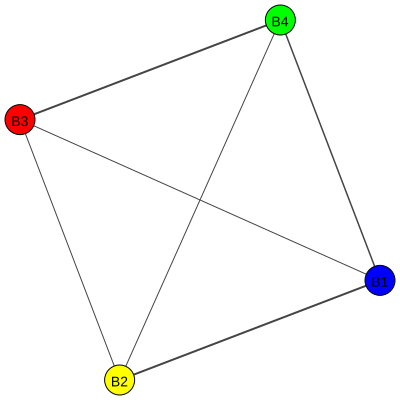